# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [147]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [148]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [149]:
# 1) Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, 
# explicada por sex, smoker, diner e net_bill:

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [150]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [151]:
# 2) Remova as variáveis não significantes:

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.64e-20
Time:                        22:14:01   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# 2) Remova as variáveis não significantes:

y, X = patsy.dmatrices('tip ~ smoker + net_bill + 0', tips)
X

DesignMatrix with shape (244, 3)
  smoker[Yes]  smoker[No]  net_bill
            0           1     15.98
            0           1      8.68
            0           1     17.51
            0           1     20.37
            0           1     20.98
            0           1     20.58
            0           1      6.77
            0           1     23.76
            0           1     13.08
            0           1     11.55
            0           1      8.56
            0           1     30.26
            0           1     13.85
            0           1     15.43
            0           1     11.81
            0           1     17.66
            0           1      8.66
            0           1     12.58
            0           1     13.47
            0           1     17.30
            0           1     13.84
            0           1     17.54
            0           1     13.54
            0           1     31.84
            0           1     16.64
            0           1     1

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.56e-22
Time:                        22:14:02   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
smoker[Yes]     1.2318      0.200      6.172      

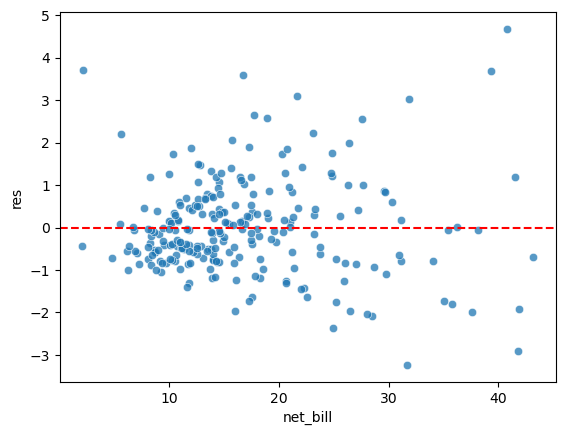

In [153]:
# 3) Observe o gráfico de resíduos em função de net_bill:

reg = smf.ols('tip ~ smoker + net_bill + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           5.38e-19
Time:                        22:14:02   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
smoker[Yes]         -1.2890      0.445  

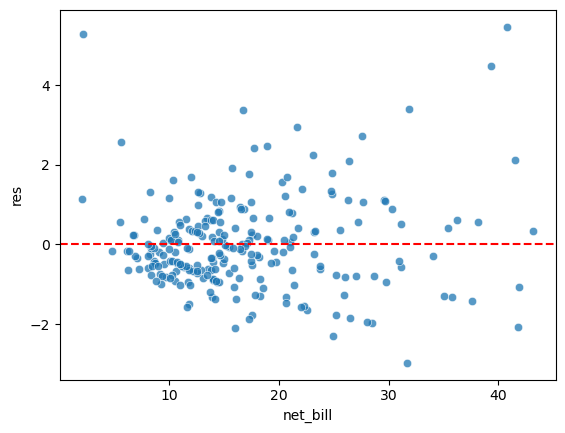

In [154]:
# 4) Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo:

# Log:

reg = smf.ols('tip ~ smoker + np.log(net_bill) + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.11e-21
Time:                        22:14:03   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
smoker[Yes]               1.01

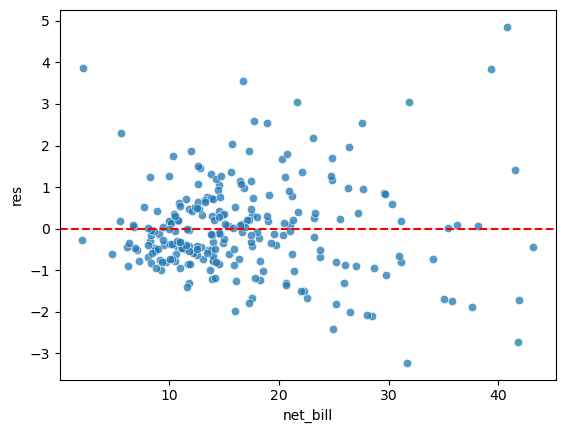

In [155]:
# Polinônio:

reg = smf.ols('tip ~ smoker + net_bill + np.power(net_bill, 2) + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [156]:
# melhor modelo é o ajustado em função do polinônio de net_bill com R² 0.336.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [157]:
# 1) Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no 
#log de tip, explicado por sex, smoker, diner e net_bill.

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [158]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [159]:
# 2) Remova as variáveis não significantes:

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.21e-18
Time:                        22:14:05   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill + 0', tips)
X

DesignMatrix with shape (244, 3)
  smoker[Yes]  smoker[No]  net_bill
            0           1     15.98
            0           1      8.68
            0           1     17.51
            0           1     20.37
            0           1     20.98
            0           1     20.58
            0           1      6.77
            0           1     23.76
            0           1     13.08
            0           1     11.55
            0           1      8.56
            0           1     30.26
            0           1     13.85
            0           1     15.43
            0           1     11.81
            0           1     17.66
            0           1      8.66
            0           1     12.58
            0           1     13.47
            0           1     17.30
            0           1     13.84
            0           1     17.54
            0           1     13.54
            0           1     31.84
            0           1     16.64
            0           1     1

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.31e-20
Time:                        22:14:06   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
smoker[Yes]     0.4639      0.064      7.254      

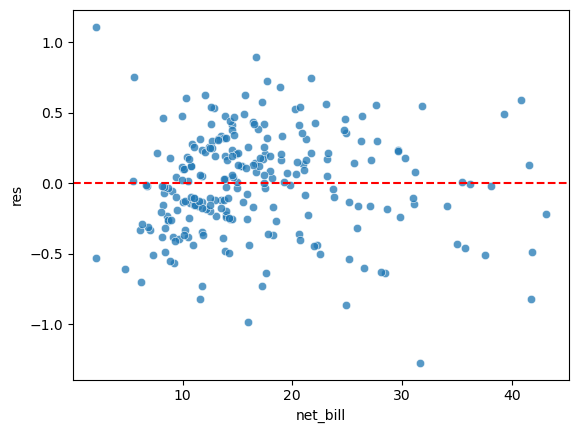

In [161]:
# 3) Observe o gráfico de resíduos em função de net_bill:

reg = smf.ols('np.log(tip) ~ smoker + net_bill + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     28.12
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.79e-19
Time:                        22:14:07   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sex[Male]           -0.4185      0.145  

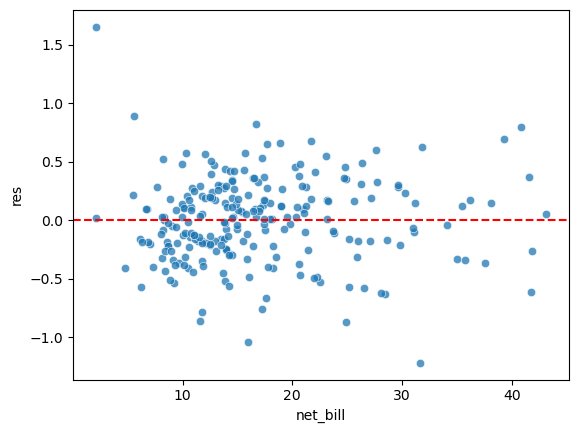

In [162]:
# 4) Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo:

# Log:

reg = smf.ols('np.log(tip) ~ sex + smoker + time + np.log(net_bill) + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     40.92
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.15e-21
Time:                        22:14:08   Log-Likelihood:                -92.864
No. Observations:                 244   AIC:                             193.7
Df Residuals:                     240   BIC:                             207.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.17

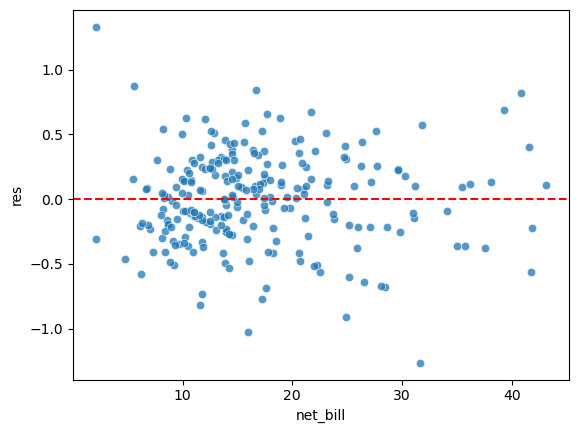

In [163]:
# Polinônio:

reg = smf.ols('np.log(tip) ~ smoker + net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [164]:
# melhor modelo é o ajustado em função do log de tip e polinônio de net_bill com R² 0.338.

In [165]:
# 5) Do modelo final deste item, calcule o 𝑅2 na escala de tip (sem o log). Compare com
# o modelo do item 1. Qual tem melhor coeficiente de determinação?

reg = smf.ols('tip ~ smoker + net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.11e-21
Time:                        22:14:09   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.01

In [166]:
# Comparando com o R² dos modelos do item 1, o melhor coeficiente de determinação (R²) 

In [167]:
# Modelos do item 1: 

reg = smf.ols('tip ~ smoker + net_bill + 0', data = tips).fit()
print(reg.summary())
print('X'*100)

# Log:
reg = smf.ols('tip ~ smoker + np.log(net_bill) + 0', data = tips).fit()
print(reg.summary())
print('X'*100)

# Polinônio:
reg = smf.ols('tip ~ smoker + net_bill + np.power(net_bill, 2) + 0', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.56e-22
Time:                        22:14:10   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
smoker[Yes]     1.2318      0.200      6.172      

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [168]:
df = pd.read_csv('previsao_de_renda.csv')

df1 = df.drop(df[['Unnamed: 0','data_ref', 'index']], axis=1)
df1.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [169]:
# 1) Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, 
# por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. 
# Utilize os recursos que achar necessário.


reg = smf.ols('renda ~ tempo_emprego', data = df1).fit()
df1['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:11   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# 2) Faça uma análise de resíduos.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:12   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

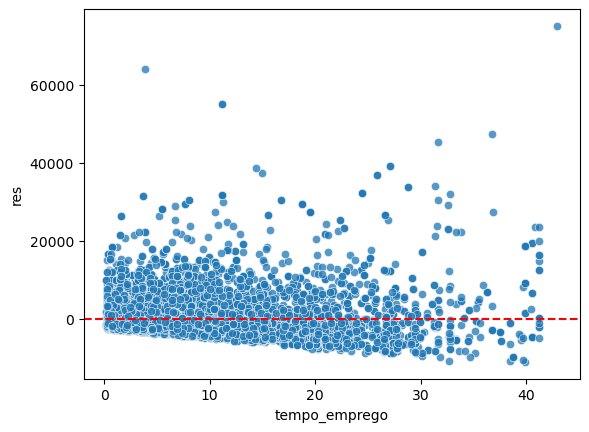

In [171]:
reg = smf.ols('renda ~ tempo_emprego', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          7.66e-236
Time:                        22:14:13   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.16

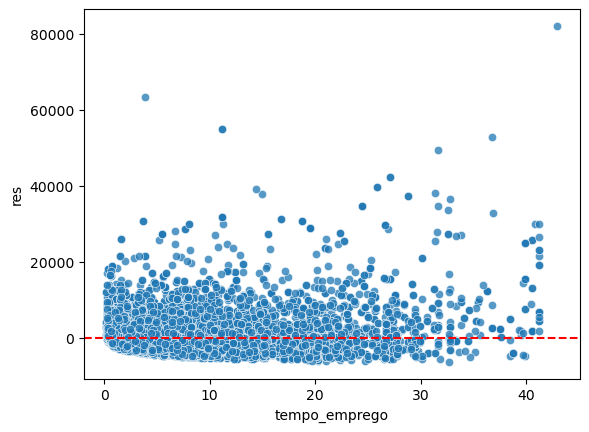

In [172]:
# Com os recursos vistos neste módulo, como você melhoraria esta regressão?

# R. podemos  transformar X e Y para tentar melhoras o modelo:

# log de tempo_emprego:

reg = smf.ols('renda ~ np.log(tempo_emprego)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:14   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002

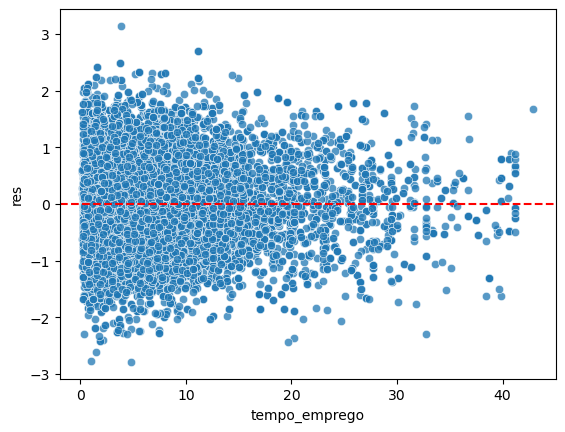

In [173]:
# log de renda:

reg = smf.ols('np.log(renda) ~ tempo_emprego', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:14   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

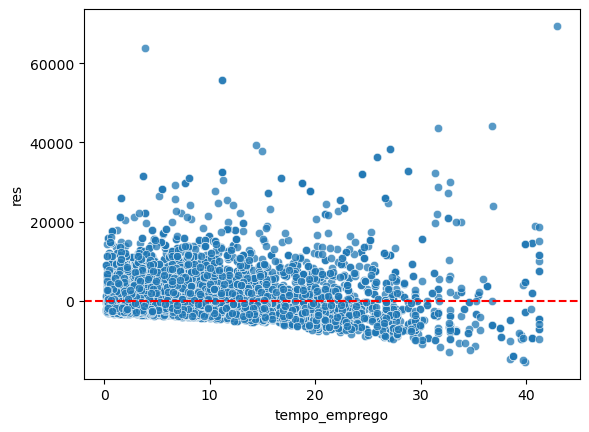

In [174]:
# Polinônio de tempo_emprego :

reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.921
Model:                            OLS   Adj. R-squared:                 -0.921
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                nan
Time:                        22:14:15   Log-Likelihood:            -1.2761e+05
No. Observations:               12466   AIC:                         2.552e+05
Df Residuals:                   12465   BIC:                         2.552e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.095e-

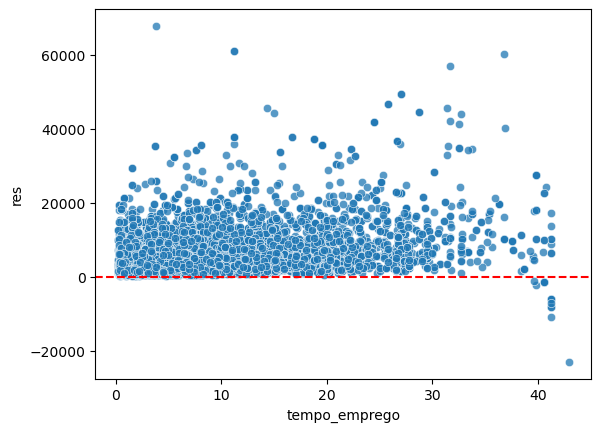

In [175]:
# Função exponencial de tempo_emprego :

reg = smf.ols('renda ~ np.exp(tempo_emprego)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [176]:
# 3) Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) 
# de acordo com as demais variáveis.

y, X = patsy.dmatrices('renda ~ posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+idade+tempo_emprego+qt_pessoas_residencia+mau', df1)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:16   Log-Likelihood:            -1.2234e+05
No. Observations:               12466   AIC:                         2.447e+05
Df Residuals:                   12441   BIC:                         2.449e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

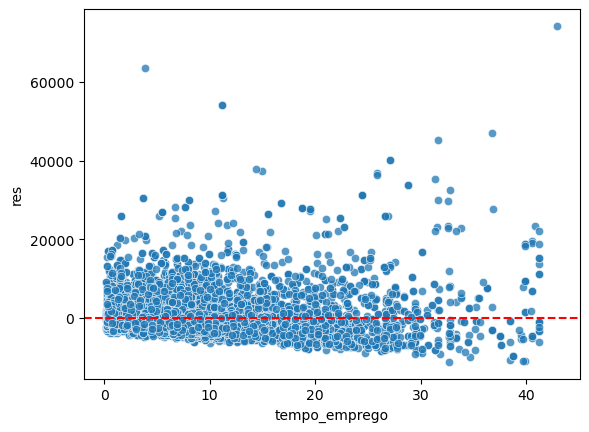

In [177]:
reg = smf.ols('renda ~ posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+idade+tempo_emprego+qt_pessoas_residencia+mau', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [178]:
# 4) Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros.

# R. As variáveis com P>|t| menores que 0.5 são as mais significantes.

y, X = patsy.dmatrices('renda ~ posse_de_veiculo + educacao + posse_de_imovel + tempo_emprego + 0', df1)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     352.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:17   Log-Likelihood:            -1.2242e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12458   BIC:                         2.449e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
posse_de_veiculo[False]          2205.6559    453.417      4.865      0.000    1316.888    3094.424
posse_de_veiculo[True]           2908.8263    454.819      6.396      0.000    2017.310    3800.342
educacao[T.Pós graduação]        1799.4715   1115.925      1.613      0.107    -387.914    3986.857
educacao[T.Secundário]           -312.3835    451.027     -0.693      0.489   -1196.466     571.699
educacao[T.Superior completo]     164.6775    452.743      0.364      0.716    -722.769    1052.124
educacao[T.Superior incompleto]  -495.6064    485.268     -1.021      0.307   -1446.807     455.594
posse_de_imovel[T.True]           385.1179     83.893      4.591      0.000     220.674     549.562
tempo_emprego                     288.4274      5.914     48.771      0.000     276.835     300.019
==============================================================================
Omnibus:                    10021.568   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           400488.054
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      29.830   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     352.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:14:18   Log-Likelihood:            -1.2242e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12458   BIC:                         2.449e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
posse_de_v

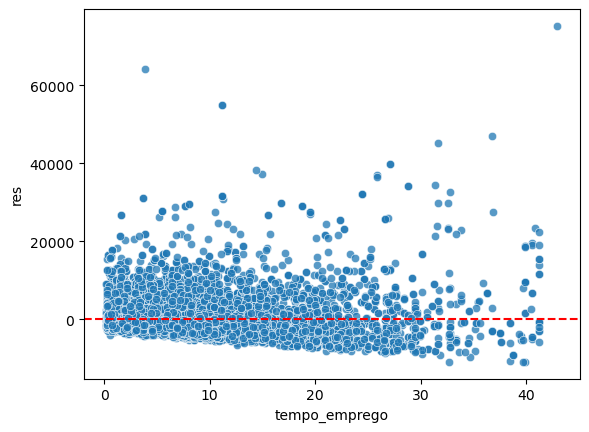

In [179]:
# 5) Faça uma análise de resíduos. Avalie a qualidade do ajuste.

# R. O modelo ajustado apresentou R² menor do que o modelo original (sem ajuste).

reg = smf.ols('renda ~ posse_de_veiculo + educacao + posse_de_imovel + tempo_emprego + 0', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')